In [9]:
import numpy as np
from matplotlib import pyplot as plt

L=1
Nx=101
D=10**(-6)
dt=50*D
t_final=5000000*D
x_ax=np.linspace(0,L+L/(Nx-1),Nx+1)
dx=x_ax[1]-x_ax[0]
t_ax=np.arange(0,t_final+dt,dt)
print(dx,dt)

bcdl=1
bcdr=0
C0=0
grid=np.zeros((len(t_ax),len(x_ax)))
grid[:,0]=bcdl
s=dt/(dx**2)
print(s)




0.01 4.9999999999999996e-05
0.49999999999999994


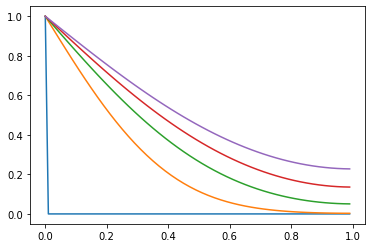

In [10]:
for t in range(len(t_ax)-1):
    for x in range(1,len(x_ax)-1):
        grid[t+1,x]=grid[t,x]+s*(grid[t,x-1]-2*grid[t,x]+grid[t,x+1])
        grid[t+1,-1]=grid[t+1,-3]
    if(t%1000==0 and t<5000):
        plt.plot(x_ax[0:Nx-1],grid[t,0:Nx-1])

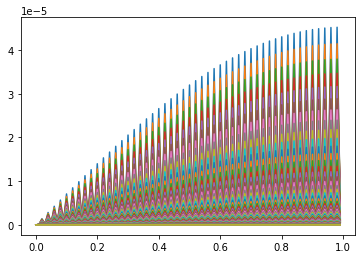

In [11]:
for t in range(len(t_ax)-1):
    if(t%1000==0 and t>10000):
        plt.plot(x_ax[0:Nx-1],grid[t,0:Nx-1]-analytic(x_ax[0:Nx-1],t*dt))

In [2]:
def TDMAsolver(a, b, c, d):
    '''
    TDMA solver, a b c d can be NumPy array type or Python list type.
    refer to http://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
    and to http://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)
    '''
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        	    
    xc = bc
    #xc[0]=1
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

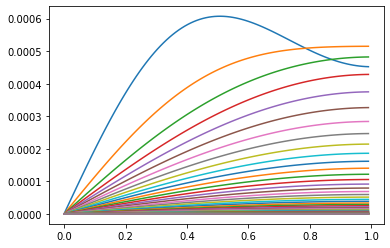

In [5]:
a=np.full(Nx-1,-s)
a[-1]+=-s
b=np.full(Nx,(1+2*s))
b[0]=1
c=np.full(Nx-1,-s)
c[0]=0
d=grid[0,0:-1]
for t in range(len(t_ax)-1):
    d=TDMAsolver(a,b,c,d)
    d[0]=1
    if(t%1000==0 and t>1000):
        #plt.plot(x_ax[0:Nx],d)
        plt.plot(x_ax[0:Nx-1],d[0:Nx-1]-analytic(x_ax[0:Nx-1],t*dt))
    

In [6]:
def analytic(x, t):
    result = 1
    for n in range(1001):
        result -= 2*(-1)**n/((n+0.5)*np.pi)*np.cos((n+0.5)*np.pi*(1-x))*np.exp(-(n+1/2)**2*np.pi*np.pi*t)
    return result

In [7]:
print(analytic(x_ax,0.001))

[ 1.00000000e+00  8.26476846e-01  6.61063948e-01  5.10752098e-01
  3.80546713e-01  2.73029872e-01  1.88397641e-01  1.24892816e-01
  7.94684160e-02  4.84954306e-02  2.83633719e-02  1.58894108e-02
  8.52171868e-03  4.37342746e-03  2.14695432e-03  1.00781747e-03
  4.52240418e-04  1.93941629e-04  7.94668460e-05  3.11046109e-05
  1.16280780e-05  4.15111315e-06  1.41491792e-06  4.60416683e-07
  1.43012091e-07  4.23984652e-08  1.19961352e-08  3.23898141e-09
  8.34481699e-10  2.05132787e-10  4.81099286e-11  1.07643436e-11
  2.29784684e-12  4.67762562e-13  9.07154838e-14  1.67114561e-14
  2.93609344e-15  5.28488250e-16  2.00865827e-17 -1.35481771e-16
 -2.17538407e-16 -2.15310277e-16 -2.26207794e-16  8.58147705e-17
 -3.23602050e-16 -2.74394234e-16 -6.29638974e-17  2.72563837e-17
  1.05752584e-17 -1.60673790e-17 -1.19942272e-16 -5.53925574e-17
  4.73923638e-17 -5.51141313e-17  3.31072756e-17 -1.96189977e-17
 -1.07765250e-16 -5.49262138e-18  1.99443646e-16  1.69095832e-16
 -3.12402489e-17  5.52589

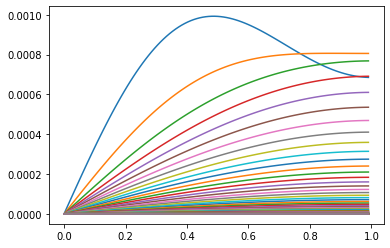

In [8]:
a=np.full(Nx-1,-s)
a[-1]+=-s
b=np.full(Nx,(1+2*s))
b[0]=1
c=np.full(Nx-1,-s)
c[0]=0
d=grid[0,0:-1]
for i in range(1,len(d)-2):
    d[i]=s*d[i-1]+(1-2*s)*d[i]+s*d[i+1]
d[-1]=2*s*d[-2]+(1-2*s)*d[-1]
for t in range(len(t_ax)-1):
    
    d=TDMAsolver(a,b,c,d)
    d[0]=1
    if(t%1000==0 and t>1000):
        #plt.plot(x_ax[0:Nx],d)
        plt.plot(x_ax[0:Nx-1],d[0:Nx-1]-analytic(x_ax[0:Nx-1],t*dt))